In [2]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

In [9]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=4,
                         xl=np.array([0, 0]),
                         xu=np.array([10 , 10]))
        self.ideal = np.array([10, 10])
        self.left = np.array([10, 0])
        self.right = np.array([0, 10])
        self.nadir = np.array([0, 0])

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = np.linalg.norm(x - self.left) ** 2
        f2 = np.linalg.norm(x - self.right) ** 2

        ideal_constraints = x - self.ideal
        nadir_constraints = self.nadir - x

        out["F"] = [f1, f2]
        out["G"] = np.concatenate([ideal_constraints, nadir_constraints])

In [10]:
problem = MyProblem()

In [11]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling

In [12]:
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

In [13]:
from pymoo.termination import get_termination
from pymoo.optimize import minimize

In [14]:
termination = get_termination("n_gen", 40)
res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       40 |     14 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |       50 |     18 |  0.000000E+00 |  0.000000E+00 |  0.0117373968 |             f
     3 |       60 |     23 |  0.000000E+00 |  0.000000E+00 |  0.0098446138 |         ideal
     4 |       70 |     27 |  0.000000E+00 |  0.000000E+00 |  0.0032738771 |             f
     5 |       80 |     30 |  0.000000E+00 |  0.000000E+00 |  0.0113332525 |         ideal
     6 |       90 |     36 |  0.000000E+00 |  0.000000E+00 |  0.0052075820 |             f
     7 |      100 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0034010659 |             f
     8 |      110 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0013431979 |             f
     9 |      120 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0106469513 |         nadir
    10 |      130 |     40 |  0.000000E+00 |  0.000000E+00 |  0.0009996761 |             f

In [15]:
import matplotlib.pyplot as plt

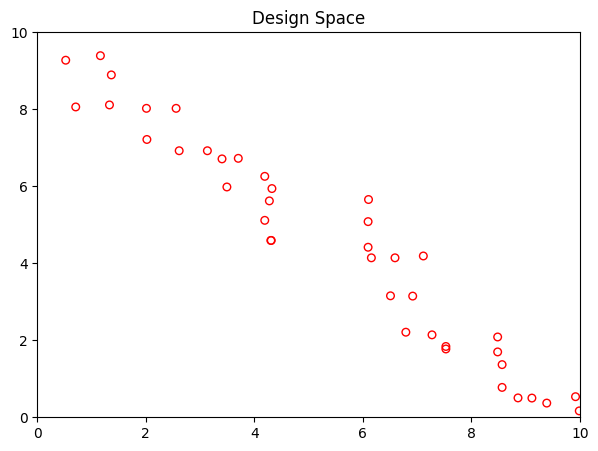

In [16]:
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

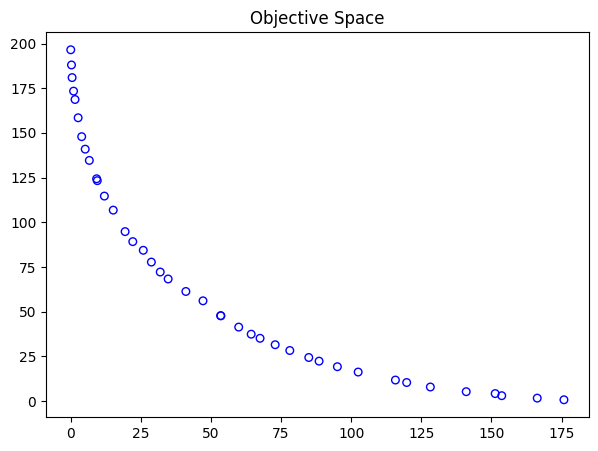

In [17]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()